In [1]:
from sqlalchemy import create_engine
import pymysql
import pandas as pd
import pyodbc
import os
import sklearn
from sklearn.datasets import load_digits
import numpy as np
import sys
!{sys.executable} -m pip install pandas-profiling
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from pandas_profiling import ProfileReport
from math import sqrt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR, SVC

In [2]:
os.chdir('Documents')

In [3]:
df = pd.read_csv('credit-one-clean.csv')

In [4]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1.0,20000.0,female,university,1.0,24.0,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,default
1,2.0,120000.0,female,university,2.0,26.0,-1.0,2.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,default
2,3.0,90000.0,female,university,2.0,34.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,not default
3,4.0,50000.0,female,university,1.0,37.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,not default
4,5.0,50000.0,male,university,1.0,57.0,-1.0,0.0,-1.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,not default


In [5]:
#Dropping Duplicates
df.drop_duplicates(inplace=True)

df.describe()

,ID,LIMIT_BAL,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,...,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,8660.398374,129747.661567,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,...,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,1.000000,10000.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,15000.500000,140000.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,22500.250000,240000.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,30000.000000,1000000.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


In [6]:
df.dtypes

ID                            float64
LIMIT_BAL                     float64
SEX                            object
EDUCATION                      object
MARRIAGE                      float64
AGE                           float64
PAY_0                         float64
PAY_2                         float64
PAY_3                         float64
PAY_4                         float64
PAY_5                         float64
PAY_6                         float64
BILL_AMT1                     float64
BILL_AMT2                     float64
BILL_AMT3                     float64
BILL_AMT4                     float64
BILL_AMT5                     float64
BILL_AMT6                     float64
PAY_AMT1                      float64
PAY_AMT2                      float64
PAY_AMT3                      float64
PAY_AMT4                      float64
PAY_AMT5                      float64
PAY_AMT6                      float64
default payment next month     object
dtype: object

In [7]:
#Filling in missing values with the mean of the column
df.fillna(df.mean(), inplace=True)

In [ ]:
#Pandas Profiling Summary Report
profile = pandas_profiling.ProfileReport(df, title='Pandas Profiling Report for Credit One', explorative=True)
profile.to_file("credit-one-profile.html")

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30001 entries, 0 to 30000
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30001 non-null  float64
 1   LIMIT_BAL                   30001 non-null  float64
 2   SEX                         30000 non-null  object 
 3   EDUCATION                   30000 non-null  object 
 4   MARRIAGE                    30001 non-null  float64
 5   AGE                         30001 non-null  float64
 6   PAY_0                       30001 non-null  float64
 7   PAY_2                       30001 non-null  float64
 8   PAY_3                       30001 non-null  float64
 9   PAY_4                       30001 non-null  float64
 10  PAY_5                       30001 non-null  float64
 11  PAY_6                       30001 non-null  float64
 12  BILL_AMT1                   30001 non-null  float64
 13  BILL_AMT2                   300

In [9]:
#Creating dummy variable for object data types
credit = pd.get_dummies(df)

In [10]:
credit.dtypes

ID                                        float64
LIMIT_BAL                                 float64
MARRIAGE                                  float64
AGE                                       float64
PAY_0                                     float64
PAY_2                                     float64
PAY_3                                     float64
PAY_4                                     float64
PAY_5                                     float64
PAY_6                                     float64
BILL_AMT1                                 float64
BILL_AMT2                                 float64
BILL_AMT3                                 float64
BILL_AMT4                                 float64
BILL_AMT5                                 float64
BILL_AMT6                                 float64
PAY_AMT1                                  float64
PAY_AMT2                                  float64
PAY_AMT3                                  float64
PAY_AMT4                                  float64


In [11]:
#Checking header of newly split out object variables
credit.head()

,ID,LIMIT_BAL,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,PAY_AMT5,PAY_AMT6,SEX_female,SEX_male,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_other,EDUCATION_university,default payment next month_default,default payment next month_not default
0,1.0,20000.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,-2.0,...,0.0,0.0,1,0,0,0,0,1,1,0
1,2.0,120000.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,2.0,...,0.0,2000.0,1,0,0,0,0,1,1,0
2,3.0,90000.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1000.0,5000.0,1,0,0,0,0,1,0,1
3,4.0,50000.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1069.0,1000.0,1,0,0,0,0,1,0,1
4,5.0,50000.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,0.0,...,689.0,679.0,0,1,0,0,0,1,0,1


In [62]:
#discretization

credit['LIMIT_Bal_Bins']=pd.cut(x=credit['LIMIT_BAL'], bins=[0,50000,100000,200000,300000,1000000], labels = ["0-50K", "50-100K", "100-200K", "200-300K", "300K+"])
credit['AGE_Bins']=pd.cut(x=credit['AGE'], bins=[0,25,35,45,55,65,100], labels = ["20-25", "26-35", "36-45", "46-55", "56-65", "66+"])

credit.head()

,ID,LIMIT_BAL,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,SEX_female,SEX_male,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_other,EDUCATION_university,default payment next month_default,default payment next month_not default,LIMIT_Bal_Bins,AGE_Bins
0,1.0,20000.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,-2.0,...,1,0,0,0,0,1,1,0,0-50K,20-25
1,2.0,120000.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,2.0,...,1,0,0,0,0,1,1,0,100-200K,26-35
2,3.0,90000.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,1,0,1,50-100K,26-35
3,4.0,50000.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,1,0,1,0-50K,36-45
4,5.0,50000.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,0.0,...,0,1,0,0,0,1,0,1,0-50K,56-65


In [51]:
header = credit.dtypes.index
print(header)

Index(['ID', 'LIMIT_BAL', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3',
       'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3',
       'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2',
       'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'SEX_female',
       'SEX_male', 'EDUCATION_graduate school', 'EDUCATION_high school',
       'EDUCATION_other', 'EDUCATION_university',
       'default payment next month_default',
       'default payment next month_not default', 'LIMIT_Bal_Bins'],
      dtype='object')


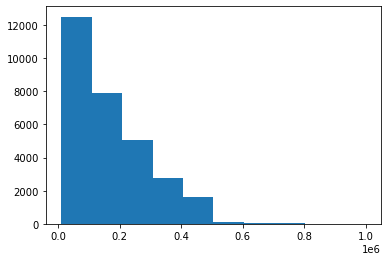

In [13]:
plt.hist(credit['LIMIT_BAL'])
plt.show()

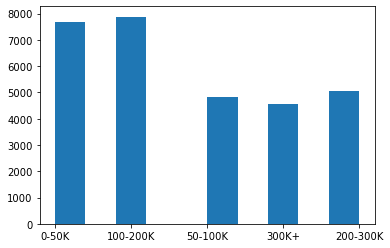

In [52]:
plt.hist(credit['LIMIT_Bal_Bins'])
plt.show()

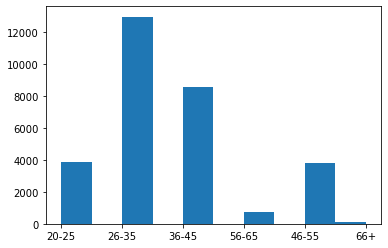

In [63]:
plt.hist(credit['AGE_Bins'])
plt.show()

/Users/jaclynfreeman/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


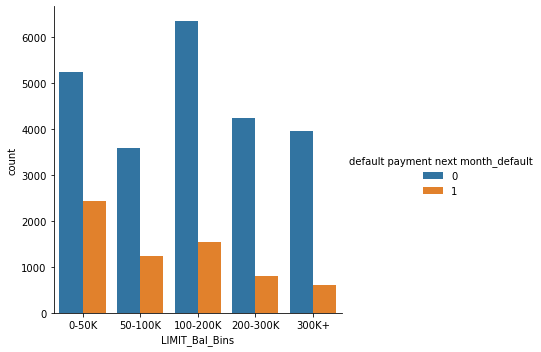

In [53]:
g=sns.factorplot('LIMIT_Bal_Bins', data=credit, hue='default payment next month_default', kind='count')

/Users/jaclynfreeman/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


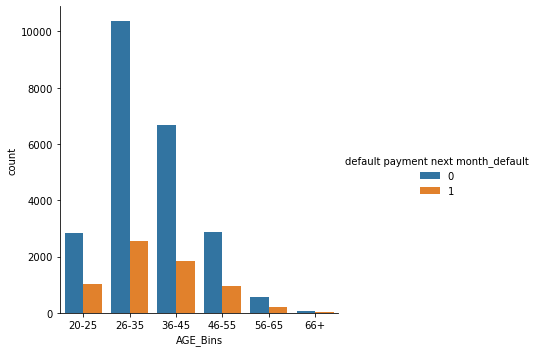

In [64]:
g=sns.factorplot('AGE_Bins', data=credit, hue='default payment next month_default', kind='count')

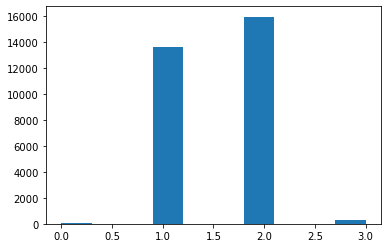

In [14]:
plt.hist(credit['MARRIAGE'])
plt.show()

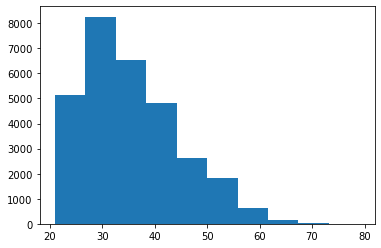

In [15]:
plt.hist(credit['AGE'])
plt.show()

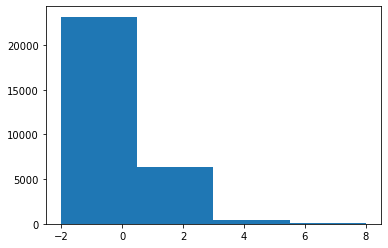

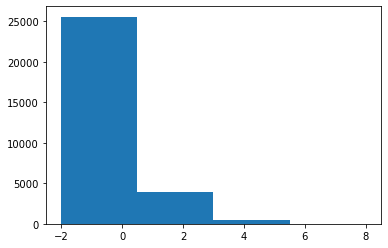

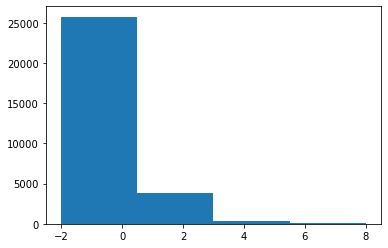

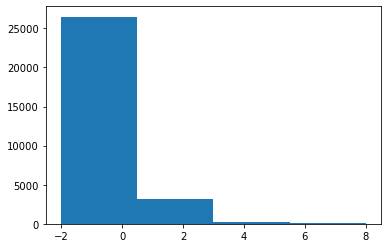

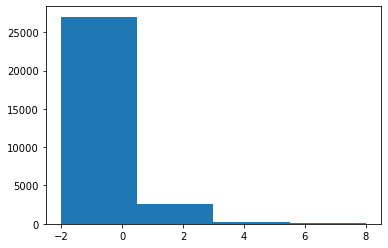

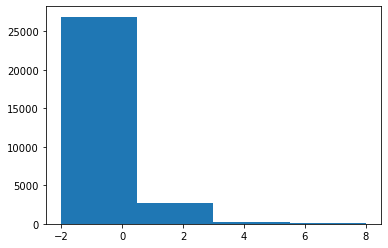

In [16]:
plt.hist(credit['PAY_0'], bins=4)
plt.show()

plt.hist(credit['PAY_2'], bins=4)
plt.show()

plt.hist(credit['PAY_3'], bins=4)
plt.show()

plt.hist(credit['PAY_4'], bins=4)
plt.show()

plt.hist(credit['PAY_5'], bins=4)
plt.show()

plt.hist(credit['PAY_6'], bins=4)
plt.show()

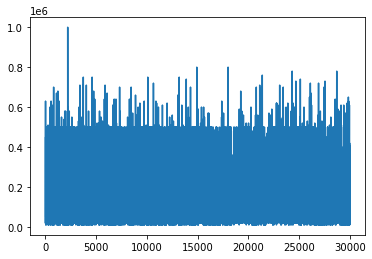

In [17]:
plt.plot(credit['LIMIT_BAL'])
plt.show()

In [18]:
x = credit['PAY_0']
y = credit['PAY_2']

<function matplotlib.pyplot.show(*args, **kw)>

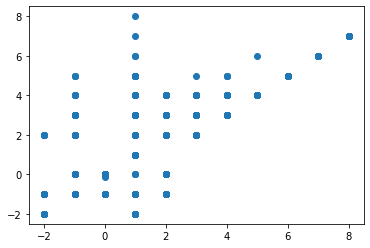

In [19]:
plt.scatter(x,y)
plt.show

/Users/jaclynfreeman/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


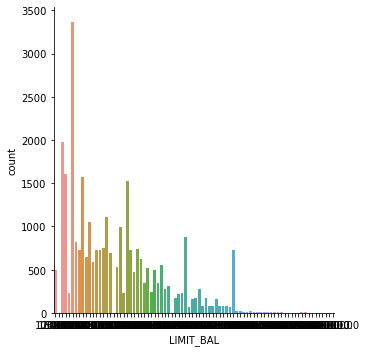

In [48]:
fg = sns.factorplot('LIMIT_BAL', data=credit, kind='count')

In [59]:
header = credit.dtypes.index
print(header)

Index(['ID', 'LIMIT_BAL', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3',
       'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3',
       'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2',
       'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'SEX_female',
       'SEX_male', 'EDUCATION_graduate school', 'EDUCATION_high school',
       'EDUCATION_other', 'EDUCATION_university',
       'default payment next month_default',
       'default payment next month_not default', 'LIMIT_Bal_Bins'],
      dtype='object')


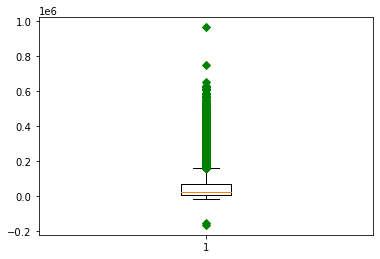

In [60]:
A = credit['BILL_AMT1']
plt.boxplot(A,0,'gD')
plt.show()

In [61]:
#Correlation Matrix
corrMat = credit.corr()
print(corrMat)

                                              ID  LIMIT_BAL  MARRIAGE  \
ID                                      1.000000   0.026179 -0.029079   
LIMIT_BAL                               0.026179   1.000000 -0.108139   
MARRIAGE                               -0.029079  -0.108139  1.000000   
AGE                                     0.018678   0.144713 -0.414170   
PAY_0                                  -0.030575  -0.271214  0.019917   
PAY_2                                  -0.011215  -0.296382  0.024199   
PAY_3                                  -0.018494  -0.286123  0.032688   
PAY_4                                  -0.002735  -0.267460  0.033122   
PAY_5                                  -0.022199  -0.249411  0.035629   
PAY_6                                  -0.020270  -0.235195  0.034345   
BILL_AMT1                               0.019389   0.285430 -0.023472   
BILL_AMT2                               0.017982   0.278314 -0.021602   
BILL_AMT3                               0.024354   

In [55]:
### Correlation heat map
## Green means positive, red means negative. 
## The stronger the color, the larger the correlation magnitude.

corr = credit.corr()


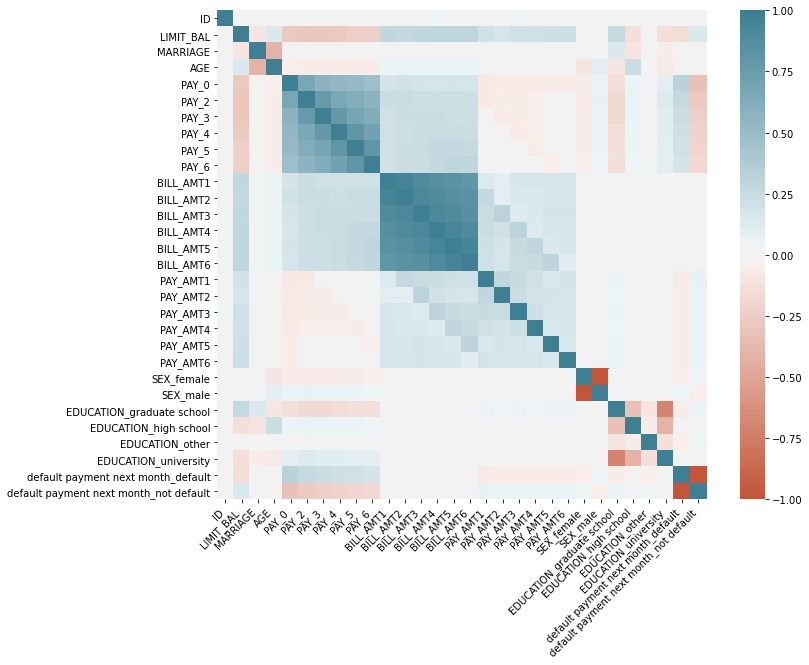

In [56]:
plt.figure(figsize=(12, 9))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [57]:
covMat = credit.cov()
print(covMat)

                                                  ID     LIMIT_BAL  \
ID                                      7.500000e+07  2.941566e+07   
LIMIT_BAL                               2.941566e+07  1.683389e+10   
MARRIAGE                               -1.314481e+02 -7.323426e+03   
AGE                                     1.491007e+03  1.730710e+05   
PAY_0                                  -2.975627e+02 -3.954461e+04   
PAY_2                                  -1.162731e+02 -4.603611e+04   
PAY_3                                  -1.916858e+02 -4.443077e+04   
PAY_4                                  -2.769040e+01 -4.057046e+04   
PAY_5                                  -2.178528e+02 -3.666934e+04   
PAY_6                                  -2.018707e+02 -3.509191e+04   
BILL_AMT1                               1.236405e+07  2.726929e+09   
BILL_AMT2                               1.108355e+07  2.570045e+09   
BILL_AMT3                               1.462639e+07  2.548448e+09   
BILL_AMT4           

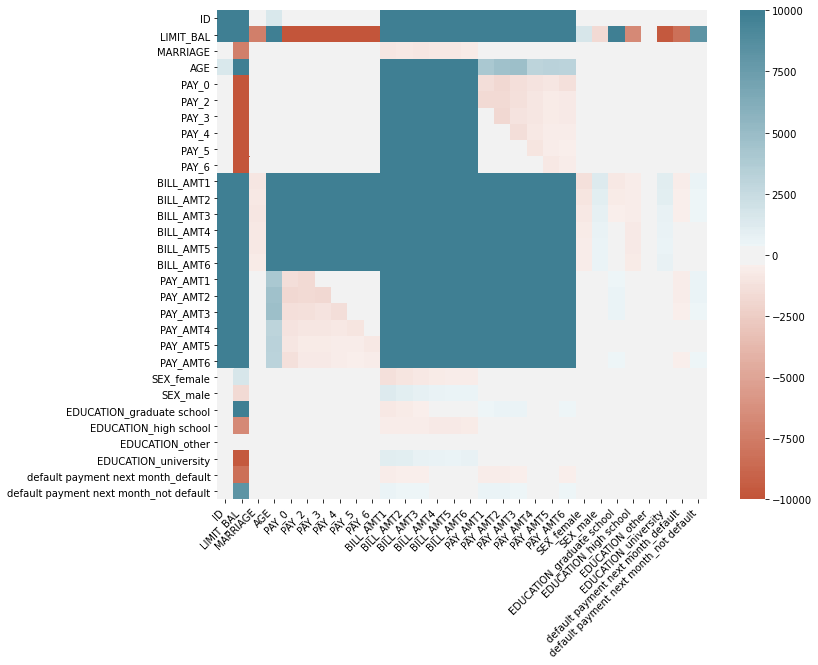

In [58]:
#Covariance heat map

plt.figure(figsize=(12, 9))
ax = sns.heatmap(
    covMat, 
    vmin=-10000, vmax=10000, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);